# **Import Modules**

In [1]:
from supervised_learning.knn import KNN as KNNCustom
from supervised_learning.polynomial_regression import PolynomialRegression as PolynomialRegressionCustom
from supervised_learning.ann import ANN as ANNCustom
from supervised_learning.regression_tree import DecisionTreeRegressor as DecisionTreeRegressorCustom
from supervised_learning.svm import SVM as SVMCustom

from unsupervised_learning.kmeans import KMeans as KMeansCustom
from unsupervised_learning.pca import PCA as PCACustom
from unsupervised_learning.dbscan import DBSCAN as DBSCANCustom

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC, SVR

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, PolynomialFeatures
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.preprocessing import StandardScaler

import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
SETTING = {
    'random_state': 42,
    'n_jobs': -1,
    'n_repeats': 10,
    'n_splits': 10,
    'n_folds': 10,
    'n_iter': 100,
    'cv': 5,
    'scoring': 'roc_auc',
    'verbose': 0,
    'TARGET': 'Premium Amount',
    'train_path' : '../dataset/data.csv',
}

# **Import Dataset**

In [3]:
df = pd.read_csv(SETTING['train_path'])
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,372605,52.0,Female,5538.0,Married,NaN,Master's,Employed,8.093145,Rural,...,0.0,18.0,497.0,3.0,2020-02-10 15:21:39.274993,Average,No,Weekly,Apartment,2742.0
1,551204,60.0,Female,39711.0,Married,4.0,Bachelor's,Employed,NaN,Suburban,...,0.0,3.0,340.0,3.0,2020-10-16 15:21:39.097737,Poor,No,Weekly,Apartment,1347.0
2,240320,58.0,Female,2364.0,Married,2.0,Bachelor's,NaN,34.452482,Urban,...,2.0,19.0,NaN,7.0,2021-01-02 15:21:39.126661,Poor,No,Monthly,House,2196.0
3,1047361,39.0,Male,9094.0,Divorced,0.0,Bachelor's,NaN,26.241661,Rural,...,1.0,17.0,761.0,5.0,2022-05-11 15:21:39.134960,Poor,Yes,Rarely,Condo,684.0
4,555362,47.0,Male,43189.0,Divorced,NaN,PhD,NaN,26.691921,Suburban,...,1.0,4.0,319.0,4.0,2020-07-28 15:21:39.181605,Poor,Yes,Weekly,Apartment,1714.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1200 non-null   int64  
 1   Age                   1183 non-null   float64
 2   Gender                1200 non-null   object 
 3   Annual Income         1148 non-null   float64
 4   Marital Status        1180 non-null   object 
 5   Number of Dependents  1091 non-null   float64
 6   Education Level       1200 non-null   object 
 7   Occupation            816 non-null    object 
 8   Health Score          1129 non-null   float64
 9   Location              1200 non-null   object 
 10  Policy Type           1200 non-null   object 
 11  Previous Claims       828 non-null    float64
 12  Vehicle Age           1200 non-null   float64
 13  Credit Score          1056 non-null   float64
 14  Insurance Duration    1200 non-null   float64
 15  Policy Start Date    

# **Exploratory Data Analysis (EDA)** 📊

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1200.0,605975.882500,354213.020877,4765.000000,292575.250000,592121.000000,921788.750000,1.199674e+06
Age,1183.0,41.251902,13.694050,18.000000,29.000000,42.000000,53.500000,6.400000e+01
Annual Income,1148.0,33937.630662,32364.376086,20.000000,7613.750000,25780.000000,45985.250000,1.479410e+05
Number of Dependents,1091.0,2.021998,1.396415,0.000000,1.000000,2.000000,3.000000,4.000000e+00
Health Score,1129.0,25.315401,12.308080,3.077691,15.465802,23.972112,34.253679,5.384470e+01
Previous Claims,828.0,1.035024,1.009019,0.000000,0.000000,1.000000,2.000000,5.000000e+00
Vehicle Age,1200.0,9.515000,5.719881,0.000000,5.000000,9.000000,15.000000,1.900000e+01
Credit Score,1056.0,586.750000,155.103855,300.000000,462.750000,589.000000,722.000000,8.480000e+02
Insurance Duration,1200.0,5.033333,2.596698,1.000000,3.000000,5.000000,7.000000,9.000000e+00
Premium Amount,1200.0,1076.002500,870.585999,20.000000,483.500000,837.000000,1482.750000,4.970000e+03


### **Checking Missing Values**

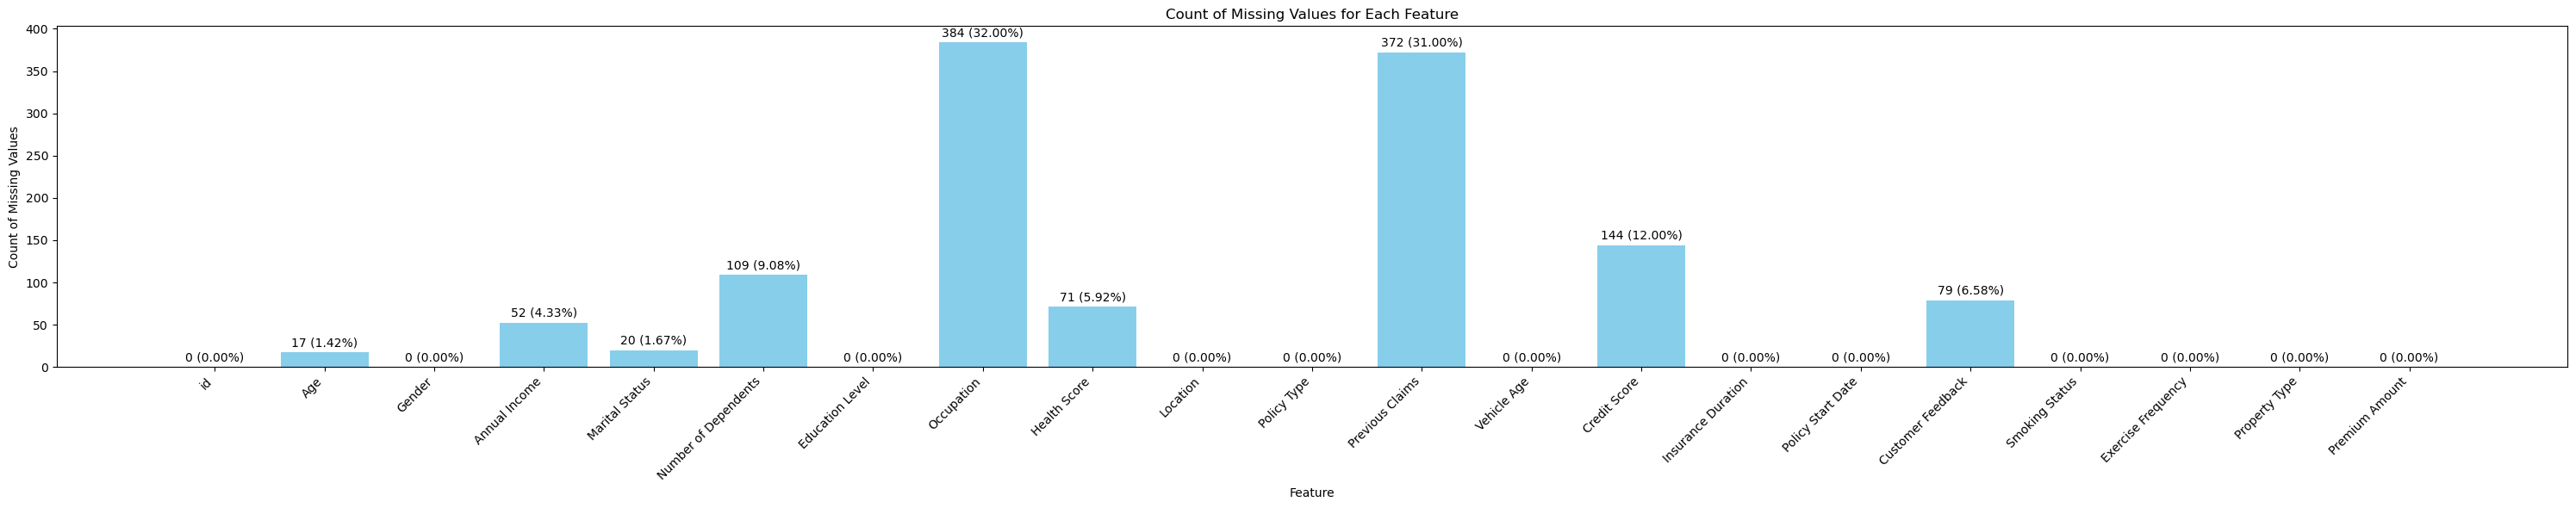

In [6]:
missing_values_count = df.isnull().sum()
total_values = len(df)
missing_values_percentage = (missing_values_count / total_values) * 100

plt.figure(figsize=(30, 6))
bars = plt.bar(missing_values_count.index, missing_values_count.values, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Count of Missing Values')
plt.title('Count of Missing Values for Each Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar, feature_name in zip(bars, missing_values_count.index):
    yval = bar.get_height()
    yperc = missing_values_percentage[feature_name]
    plt.annotate(f'{yval} ({yperc:.2f}%)', 
                xy=(bar.get_x() + bar.get_width() / 2, yval), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

plt.show()

Ada beberapa fitur yang memiliki null values. Hal ini bisa diasumsikan berbagai hal, null memang disengaja atau tidak disengaja. Misal saja untuk Previous Claims, null bisa menandakan pengguna belum melakukan claim apapun. Namun untuk hal lain yang tidak bisa diasumsikan bisa dilakukan pengisian berdasarkan distribusi datanya.

### **Checking Overall Distribution**

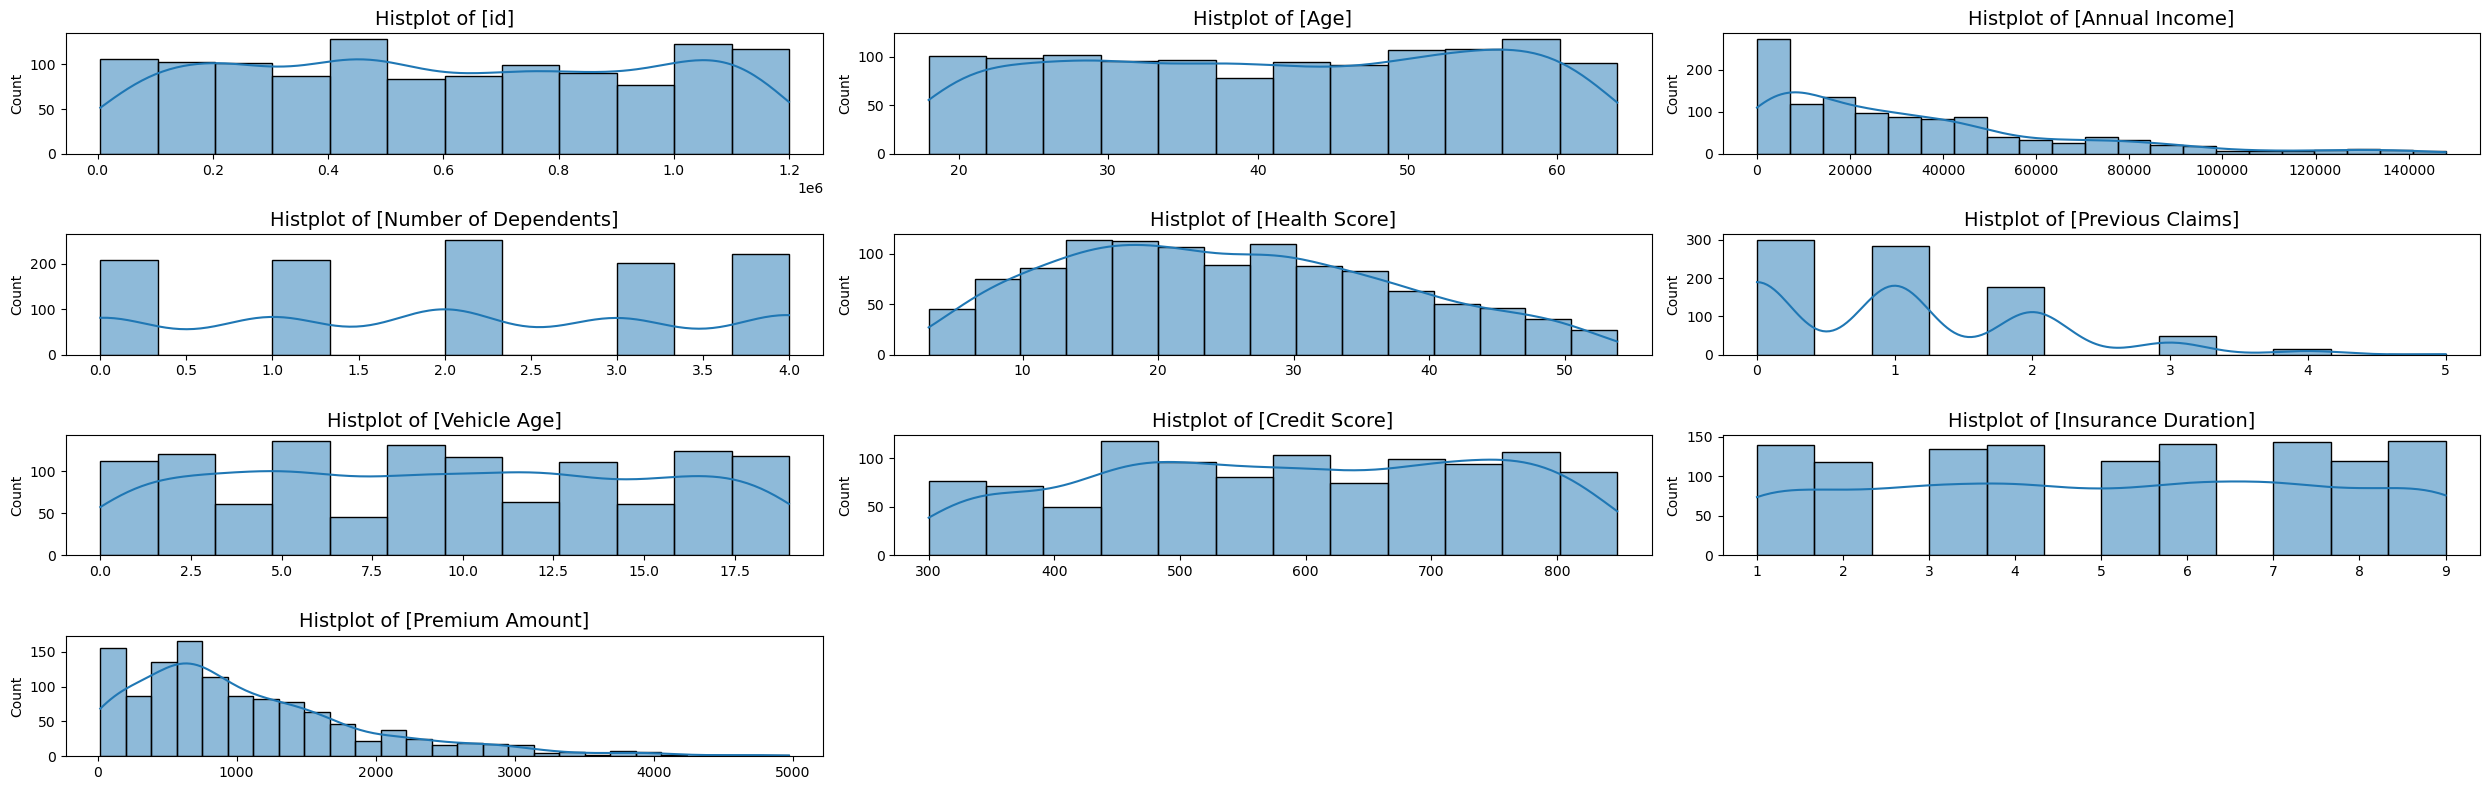

In [7]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
n = len(num_cols)
n_cols = 3
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(25, 2*n_rows))

for j, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, j)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histplot of [{col}]', size=14)
    plt.xlabel("")

plt.tight_layout()
plt.show()

Terlihat ada beberapa fitur yang memiliki skew ke kanan, terutama pada kolom target (Premium Ammount) dan Annual Income

### **Checking Duplicate**

In [8]:
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")
if duplicate_count > 0:
    print(df[df.duplicated()].head())

Jumlah baris duplikat: 0


### **Checking Outlier**

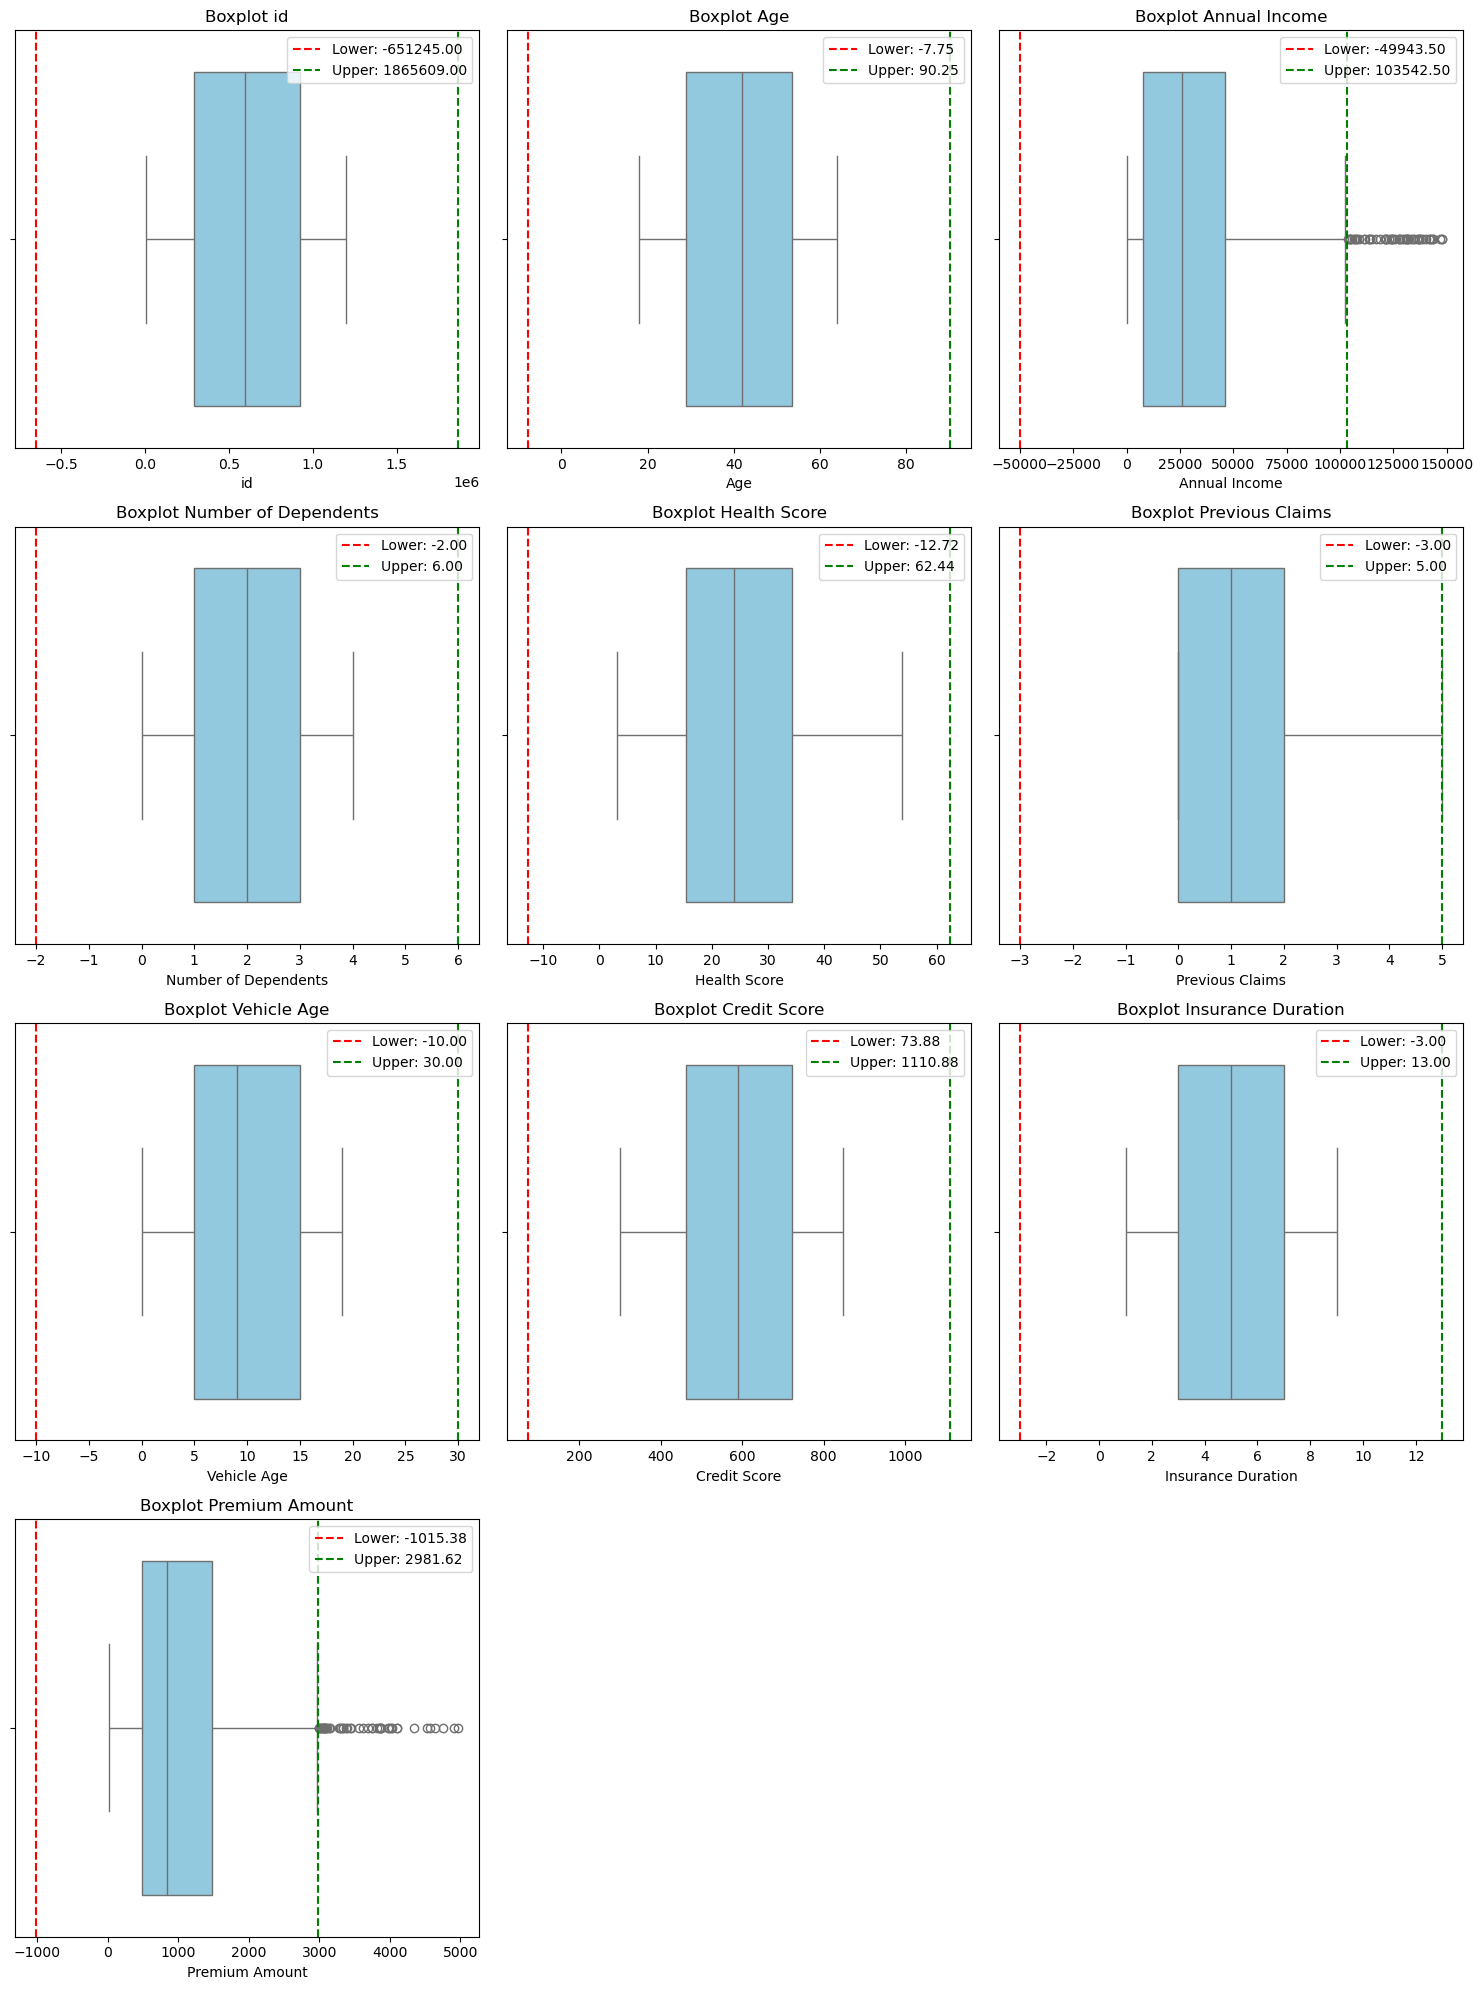

In [9]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

numeric_cols = df.select_dtypes(include=[np.number]).columns
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    outliers, low, high = detect_outliers_iqr(df, col)
    sns.boxplot(x=df[col], ax=axes[i], color="skyblue")
    axes[i].axvline(low, color="red", linestyle="--", label=f"Lower: {low:.2f}")
    axes[i].axvline(high, color="green", linestyle="--", label=f"Upper: {high:.2f}")
    axes[i].set_title(f"Boxplot {col}")
    axes[i].legend()

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Dari analisis diatas, kita mengetahui nilai-nilai pencilan. Hal ini akan menjadi tantangan sendiri bagi model untuk melihat pola dalam training. Untuk melihat seberapa jauh model dapat memprediksi dengan baik--terutama pada nilai outlier--kita perlu menggunakan metrik yang dapat memberikan punishment besar pada nilai dengan perbedaan prediksi yang jauh. RMSE dapat menjadi salah satu kunci penggunaan metrik untuk evaluasi model pada task ini.

### **Heatmap Analysis**

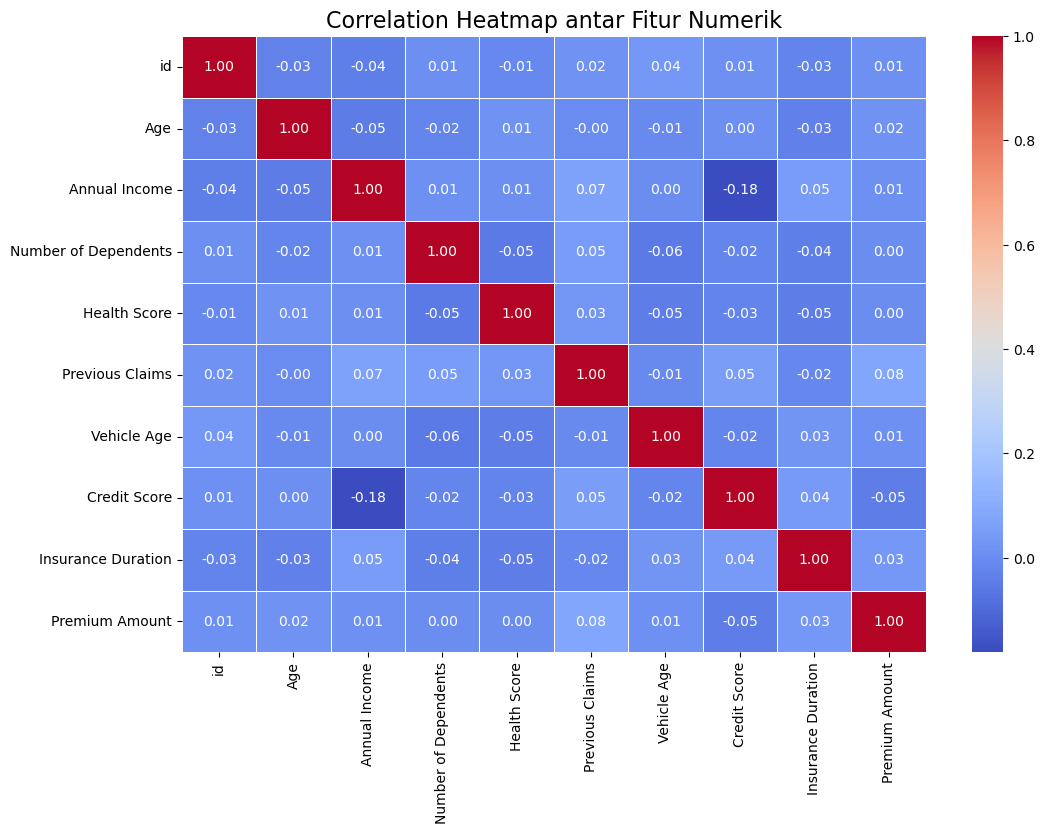

In [10]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap antar Fitur Numerik", size=16)
plt.show()

Analisis ini digunakan untuk melihat korelasi tiap fitur numerik. Secara umum, tiap fitur memiliki nilai 0 menandakkan tidak adanya korelasi tiap fitur.

In [11]:
cat_cols = df.select_dtypes(include=['object']).columns
summary = pd.DataFrame({
    "Unique Count": [df[col].nunique() for col in cat_cols],
    "Sample Values": [df[col].unique() for col in cat_cols]
}, index=cat_cols)

print(summary)

                    Unique Count  \
Gender                         2   
Marital Status                 3   
Education Level                4   
Occupation                     3   
Location                       3   
Policy Type                    3   
Policy Start Date           1182   
Customer Feedback              3   
Smoking Status                 2   
Exercise Frequency             4   
Property Type                  3   

                                                        Sample Values  
Gender                                                 [Female, Male]  
Marital Status                       [Married, Divorced, Single, nan]  
Education Level              [Master's, Bachelor's, PhD, High School]  
Occupation                 [Employed, nan, Unemployed, Self-Employed]  
Location                                     [Rural, Suburban, Urban]  
Policy Type                           [Basic, Comprehensive, Premium]  
Policy Start Date   [2020-02-10 15:21:39.274993, 2020-10-16 15:

Terdapat data waktu (start date) yang berbentuk objek. Hal ini dapat kita eksplorasi lebih jauh untuk merekayasa fitur yang lebih baik. Selain itu, fitur objek pada umumnya tidak bisa diekstrak valuenya untuk model machine learning tradisional (terutama pada model yang saya buat). Melakukan encoding sangat disarankan untuk mendapatkan value dari fitur tersebut.

# **Data Preprocessing**

In [12]:
def feature_engineering(X: pd.DataFrame, test: bool = False) -> pd.DataFrame:
    print(f"[{datetime.datetime.now()}] Feature Engineering processing started.")
    df = X.copy()
    
    df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
    df['Policy_Year'] = df['Policy Start Date'].dt.year
    df['Policy_Month'] = df['Policy Start Date'].dt.month
    df['Policy_Day'] = df['Policy Start Date'].dt.day
    
    if df['Age'].isnull().any():
        df['Age'] = df['Age'].fillna(df['Age'].mean())
    if df['Annual Income'].isnull().any():
        df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())
    
    df['Previous Claims'] = df['Previous Claims'].fillna(0)
    
    df['Age_Bin'] = pd.qcut(df['Age'], q=4, labels=False)
    df['Income_Bin'] = pd.qcut(df['Annual Income'], q=4, labels=False)
    
    df['Claim_Income_Ratio'] = df['Previous Claims'] / (df['Annual Income'] + 1e-6)
    df['Risk_Score_Proxy'] = df['Credit Score'].fillna(0) + df['Previous Claims']
    
    print(f"[{datetime.datetime.now()}] Feature Engineering processing completed successfully.")
    return df


Untuk mendapatkan informasi dari date, disini dilakukan pemecahan fitur dari struktur data tersebut.

Age dan Annual Income di quantile cut untuk membagi data menjadi lebih seimbang, pada umur ini digunakan untuk mengkategorisasi umur dan pada Annual Income untuk mempermudah dalam melihat nilai pencilan di dalamnya

Claim income ratio dan risk score proxy merupakan turunan dari fitur lain untuk melihat risk dari tiap pelanggan lebih jelas. Jika previous claims lebih besar dibanding annual income, hal ini menandakkan pelanggan cukup beresiko bagi perusahaan asuransi, begitu pula risk score proxy.

In [13]:
def imputer(df: pd.DataFrame) -> pd.DataFrame:
    print(f"[{datetime.datetime.now()}] Imputer processing started.")
    df = df.copy()
    
    mean_cols = ["Age"]
    median_cols = ["Annual Income",
                "Number of Dependents",
                "Health Score",
                "Vehicle Age",
                "Insurance Duration",
                ]
    zero_cols = ["Previous Claims", "Credit Score"]
    mode_cols = ["Occupation",
                "Marital Status"
                ]
    
    for col in mode_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0])

    for col in zero_cols:
        if col in df.columns:
            df[col] = df[col].fillna(0)

    for col in mean_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mean())
    
    for col in median_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())
    
    print(f"[{datetime.datetime.now()}] Imputer processing completed successfully.")
    return df

In [14]:
def feature_dropping(X: pd.DataFrame) -> pd.DataFrame:
    print(f"[{datetime.datetime.now()}] Feature Dropping processing started.")
    df = X.copy()
    
    df = df.drop([
        "Policy Start Date",
        "Age",
        "Annual Income",
        "Previous Claims",
        "Credit Score"
    ], axis=1)
    
    print(f"[{datetime.datetime.now()}] Feature Dropping processing completed successfully.")
    return df


Untuk fitur yang digunakan pada fitur turunan tidak perlu lagi digunakan pada data latih. Hal ini karena informasinya sudah ada pada fitur turunan tersebut

In [15]:
def feature_encoding(X:pd.DataFrame, test:bool=False) -> pd.DataFrame:
    print(f"[{datetime.datetime.now()}] Feature Encoding processing started.")
    df = X.copy()
    cat_order = {
        "Customer Feedback": ["Poor", "Average", "Good"],
        "Exercise Frequency": ["Rarely", "Monthly", "Weekly", "Daily"]
    }
    for col, order in cat_order.items():
        if col in df.columns:
            df[col] = pd.Categorical(df[col], categories=order, ordered=True).codes
    
    other_cat = ["Gender", "Marital Status", "Education Level", "Occupation",
                "Location", "Policy Type", "Smoking Status", "Property Type"]
    
    enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    df[other_cat] = enc.fit_transform(df[other_cat])
    print(f"[{datetime.datetime.now()}] Feature Encoding processing completed successfully.")
    return df

In [16]:
train, test = train_test_split(df, test_size=0.2, random_state=SETTING['random_state'])

train = imputer(train)
train = feature_engineering(train)
train = feature_encoding(train)
train = feature_dropping(train)

test = imputer(test)
test = feature_engineering(test)
test = feature_encoding(test)
test = feature_dropping(test)

X = train.drop(SETTING['TARGET'], axis=1)
y = train[SETTING['TARGET']]

[2025-09-05 21:56:36.950502] Imputer processing started.
[2025-09-05 21:56:36.958504] Imputer processing completed successfully.
[2025-09-05 21:56:36.958504] Feature Engineering processing started.
[2025-09-05 21:56:36.971165] Feature Engineering processing completed successfully.
[2025-09-05 21:56:36.971165] Feature Encoding processing started.
[2025-09-05 21:56:36.971165] Feature Encoding processing completed successfully.
[2025-09-05 21:56:36.971165] Feature Dropping processing started.
[2025-09-05 21:56:36.980568] Feature Dropping processing completed successfully.
[2025-09-05 21:56:36.980568] Imputer processing started.
[2025-09-05 21:56:36.984774] Imputer processing completed successfully.
[2025-09-05 21:56:36.984774] Feature Engineering processing started.
[2025-09-05 21:56:36.984774] Feature Engineering processing completed successfully.
[2025-09-05 21:56:36.984774] Feature Encoding processing started.
[2025-09-05 21:56:36.998254] Feature Encoding processing completed successfu

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 331 to 1126
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    960 non-null    int64  
 1   Gender                960 non-null    float64
 2   Marital Status        960 non-null    float64
 3   Number of Dependents  960 non-null    float64
 4   Education Level       960 non-null    float64
 5   Occupation            960 non-null    float64
 6   Health Score          960 non-null    float64
 7   Location              960 non-null    float64
 8   Policy Type           960 non-null    float64
 9   Vehicle Age           960 non-null    float64
 10  Insurance Duration    960 non-null    float64
 11  Customer Feedback     960 non-null    int8   
 12  Smoking Status        960 non-null    float64
 13  Exercise Frequency    960 non-null    int8   
 14  Property Type         960 non-null    float64
 15  Policy_Year           960

# **Training**

### *Hold out validation*

### Custom

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

models_custom = {
    "KNN_custom": KNNCustom(k=5),
    "PolyReg_custom": PolynomialRegressionCustom(degree=2, iterations=500, learning_rate=0.01),
    "ANN_custom": ANNCustom([X.shape[1], 16, 1], ["relu", "linear"], loss="mse", epochs=500),
    "Tree_custom": DecisionTreeRegressorCustom(max_depth=5),
    "SVM_custom": SVMCustom(kernel="linear")
}

results_holdout_custom = {}
for name, model in models_custom.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = root_mean_squared_error(y_test, y_pred)
    results_holdout_custom[name] = score

print("Hold-out results (custom, regression):")
for name, score in results_holdout_custom.items():
    print(f"{name}: {score:.4f}")

Hold-out results (custom, regression):
KNN_custom: 895.1962
PolyReg_custom: 984.8798
ANN_custom: 1222.6457
Tree_custom: 862.0634
SVM_custom: 1345.7528


#### Scikit-Learn

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

models_sklearn = {
    "KNN_sklearn": KNeighborsRegressor(n_neighbors=5),
    "PolyReg_sklearn": make_pipeline(
                        PolynomialFeatures(degree=2, include_bias=False),
                        LinearRegression()
                    ),
    "MLPReg_sklearn": MLPRegressor(hidden_layer_sizes=(16,), max_iter=500, random_state=42),
    "TreeReg_sklearn": DecisionTreeRegressor(max_depth=5, random_state=42),
    "SVMReg_sklearn": SVR(kernel="linear")
}

results_holdout_sklearn = {}
for name, model in models_sklearn.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = root_mean_squared_error(y_test, y_pred)
    results_holdout_sklearn[name] = score

print("Hold-out results (custom, regression):")
for name, score in results_holdout_sklearn.items():
    print(f"{name}: {score:.4f}")

Hold-out results (custom, regression):
KNN_sklearn: 895.1962
PolyReg_sklearn: 990.4327
MLPReg_sklearn: 1258.6536
TreeReg_sklearn: 930.8675
SVMReg_sklearn: 873.0410


## *Kfold*

### Custom

In [20]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

models_custom = {
    "KNN_custom": KNNCustom(k=5),
    "PolyReg_custom": PolynomialRegressionCustom(degree=2, iterations=500, learning_rate=0.01, optimization='newton'),
    "ANN_custom": ANNCustom([X.shape[1], 16, 1], ["relu", "linear"], loss="mse", epochs=500),
    "Tree_custom": DecisionTreeRegressorCustom(max_depth=5),
    "SVM_custom": SVMCustom(kernel="linear"),
}

for name, model in models_custom.items():
    scores = []
    print(f"====== {name} ======")
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled), 1):
        X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        score = root_mean_squared_error(y_val, y_pred)
        scores.append(score)

        print(f"Fold {fold}: {score:.3f}")

    print(f"Mean RMSE: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

====== KNN_custom ======
Fold 1: 895.196
Fold 2: 1010.578
Fold 3: 944.400
Fold 4: 954.468
Fold 5: 976.441
Mean RMSE: 956.216 ± 38.027
====== PolyReg_custom ======
Fold 1: 990.438
Fold 2: 1350.899
Fold 3: 1107.172
Fold 4: 1044.959
Fold 5: 1153.638
Mean RMSE: 1129.421 ± 123.761
====== ANN_custom ======
Fold 1: 1162.580
Fold 2: 1020.294
Fold 3: 1115.794
Fold 4: 1080.778
Fold 5: 994.850
Mean RMSE: 1074.859 ± 61.294
====== Tree_custom ======
Fold 1: 862.063
Fold 2: 999.450
Fold 3: 933.693
Fold 4: 893.536
Fold 5: 965.399
Mean RMSE: 930.828 ± 49.054
====== SVM_custom ======
Fold 1: 1345.753
Fold 2: 1474.515
Fold 3: 1396.993
Fold 4: 1307.361
Fold 5: 1453.458
Mean RMSE: 1395.616 ± 63.005


### Scikit-learn

In [21]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

models_sklearn = {
    "KNN_sklearn": KNeighborsRegressor(n_neighbors=5),
    "PolyReg_sklearn": make_pipeline(
                        PolynomialFeatures(degree=2, include_bias=False),
                        LinearRegression()
                    ),
    "MLPReg_sklearn": MLPRegressor(hidden_layer_sizes=(16,), max_iter=500, random_state=42),
    "TreeReg_sklearn": DecisionTreeRegressor(max_depth=5, random_state=42),
    "SVMReg_sklearn": SVR(kernel="linear")
}


for name, model in models_sklearn.items():
    scores = []
    print(f"====== {name} ======")
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled), 1):
        X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        score = root_mean_squared_error(y_val, y_pred)
        scores.append(score)

        print(f"Fold {fold}: {score:.3f}")

    print(f"Mean RMSE: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

====== KNN_sklearn ======
Fold 1: 895.196
Fold 2: 1010.578
Fold 3: 944.400
Fold 4: 954.468
Fold 5: 976.441
Mean RMSE: 956.216 ± 38.027
====== PolyReg_sklearn ======
Fold 1: 990.413
Fold 2: 1350.856
Fold 3: 1107.173
Fold 4: 1045.111
Fold 5: 1153.493
Mean RMSE: 1129.409 ± 123.725
====== MLPReg_sklearn ======
Fold 1: 1257.595
Fold 2: 1381.376
Fold 3: 1302.786
Fold 4: 1214.595
Fold 5: 1356.188
Mean RMSE: 1302.508 ± 61.396
====== TreeReg_sklearn ======
Fold 1: 930.868
Fold 2: 1026.741
Fold 3: 931.463
Fold 4: 858.623
Fold 5: 966.554
Mean RMSE: 942.850 ± 54.712
====== SVMReg_sklearn ======
Fold 1: 873.041
Fold 2: 977.320
Fold 3: 910.491
Fold 4: 836.860
Fold 5: 948.768
Mean RMSE: 909.296 ± 50.494


# **Unsupervised**

In [22]:
from sklearn.metrics import silhouette_score

# Custom KMeans
kmeans_custom = KMeansCustom(k=3)
kmeans_custom.fit(X_scaled)
labels_custom = kmeans_custom.predict(X_scaled)
score_custom = silhouette_score(X_scaled, labels_custom)
print(f"Custom KMeans - Silhouette Score: {score_custom:.4f}")

# Sklearn KMeans
kmeans_sklearn = KMeans(n_clusters=3, random_state=42)
labels_sklearn = kmeans_sklearn.fit_predict(X_scaled)
score_sklearn = silhouette_score(X_scaled, labels_sklearn)
print(f"Sklearn KMeans - Silhouette Score: {score_sklearn:.4f}")

Custom KMeans - Silhouette Score: 0.0350
Sklearn KMeans - Silhouette Score: 0.0329


In [23]:
# Custom PCA
pca_custom = PCACustom(n_components=2)
X_pca_custom = pca_custom.fit_transform(X_scaled)
print("Custom PCA - Shape:", X_pca_custom.shape)

# Sklearn PCA
pca_sklearn = PCA(n_components=2)
X_pca_sklearn = pca_sklearn.fit_transform(X_scaled)
print("Sklearn PCA - Shape:", X_pca_sklearn.shape)
print("Explained Variance (Sklearn):", pca_sklearn.explained_variance_ratio_)
print("Explained Variance (Custom):", pca_custom.explained_variance_ratio_)

Custom PCA - Shape: (960, 2)
Sklearn PCA - Shape: (960, 2)
Explained Variance (Sklearn): [0.06492089 0.0618286 ]
Explained Variance (Custom): [0.06493249 0.06187601 0.05412557 0.05291852 0.05157233 0.05031413
 0.04966853 0.04841004 0.04801879 0.04659844 0.04569713 0.04489845
 0.04403721 0.04215603 0.04197984 0.04050279 0.03986843 0.03858368
 0.03784353 0.03702494 0.03115339 0.02781974]


In [25]:
X_pca_custom

array([[ 1.36044338,  1.01067497],
       [ 0.12392021, -2.30057755],
       [-0.96057259, -0.46772313],
       ...,
       [ 0.08101263, -0.28191436],
       [-1.25323456,  0.00666175],
       [-0.07031955,  0.49971389]])

In [26]:
X_pca_sklearn

array([[ 1.33895531,  1.02157673],
       [ 0.15659794, -2.31932128],
       [-0.95888901, -0.46925038],
       ...,
       [ 0.0973048 , -0.29304814],
       [-1.20669382,  0.06378209],
       [-0.05802265,  0.46504066]])

In [27]:
# Custom DBSCAN
dbscan_custom = DBSCANCustom(eps=100.0, min_samples=5)
labels_custom_db = dbscan_custom.fit_predict(X_scaled)
n_clusters_custom = len(set(labels_custom_db)) - (1 if -1 in labels_custom_db else 0)
print("Custom DBSCAN - Clusters found:", n_clusters_custom)

# Sklearn DBSCAN
dbscan_sklearn = DBSCAN(eps=100.0, min_samples=5)
labels_sklearn_db = dbscan_sklearn.fit_predict(X_scaled)
n_clusters_sklearn = len(set(labels_sklearn_db)) - (1 if -1 in labels_sklearn_db else 0)
print("Sklearn DBSCAN - Clusters found:", n_clusters_sklearn)

Custom DBSCAN - Clusters found: 1
Sklearn DBSCAN - Clusters found: 1


{0: 960}


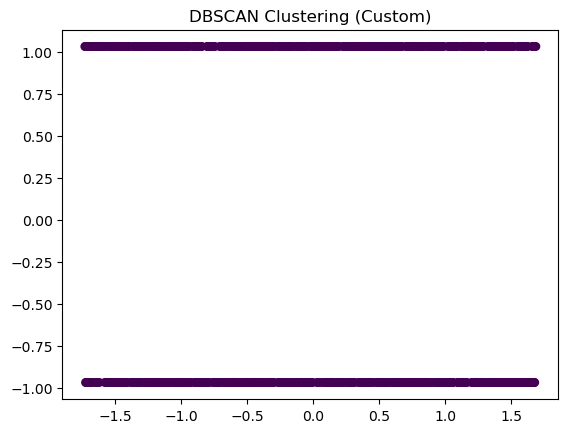

In [28]:
labels_custom = dbscan_custom.fit_predict(X_scaled)

# Hitung jumlah titik per cluster
unique, counts = np.unique(labels_custom, return_counts=True)
print(dict(zip(unique, counts)))

# Visualisasi cluster
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_custom, cmap="viridis", s=30)
plt.title("DBSCAN Clustering (Custom)")
plt.show()

{0: 960}


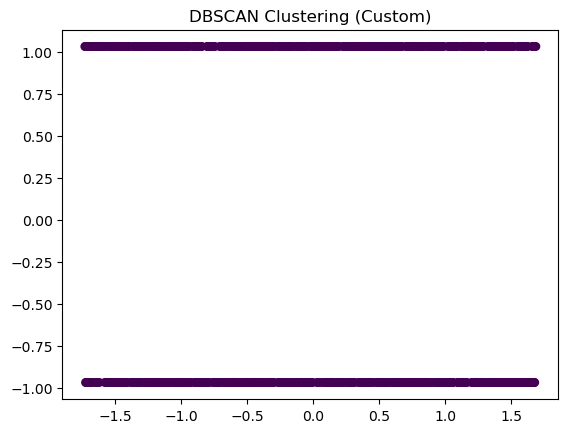

In [29]:
labels_sklearn = dbscan_sklearn.fit_predict(X_scaled)

# Hitung jumlah titik per cluster
unique, counts = np.unique(labels_sklearn, return_counts=True)
print(dict(zip(unique, counts)))

# Visualisasi cluster
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_sklearn, cmap="viridis", s=30)
plt.title("DBSCAN Clustering (Custom)")
plt.show()